Las siguientes tres celdas deben de ser comentadas en caso de que se quiera ejecutar el notebook  en google colab.   
__Importante:__ Las ejecuciones del ejercicio 1 cuando se aplica el GD usando lr=0.1 varían en función de si se ejecuta en Google Colab o en mi ordenador local.

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#cd '/content/gdrive/My Drive/AA/Practica1'

In [3]:
#ls

# Práctica 1 - Aprendizaje Automático Búsqueda Iterativa de Óptimos y Regresión Lineal

Juan José Herrera Aranda
Grupo de los Viernes

In [4]:
import numpy as np # Calculo numérico
import sympy as sp # Cálculo simbólico
import matplotlib.pyplot as plt # Graficar
from matplotlib import lines
import time # Medición de tiempo
import pandas as pd # DataFrames
from mpl_toolkits.mplot3d import Axes3D # Plot en 3d
import random

random.seed(42)
np.random.seed(42)

# 1. BÚSQUEDA ITERATIVA DE  ÓPTIMOS 

## EJERCICIO.1.1: 
Vamos a implementar el algoritmo del gradiente descendente.

In [5]:
def gradient_descend(ini,f,gradf,error=None,max_iter=None,lr=0.01,eneable_error=False,eneable_plot=False):
    '''
    Gradiente Descendente. Se puede ejecutar usando alguno de los dos criterios de parada establecidos.
    Dichos criterios son:
        Criterio de las iteraciones: Se ejecuta el número de iteraciones especificado.
        Criterio del umbral: Se ejecuta hasta que la función se quede por debajo de un umbral.
        
    
    Params
    --------
        ini: array (2,)
            punto inicial de partida
            
        f:  funcion
            función a la que le aplicamos el algoritmo
        
        grad: función
            gradiente de la función
        
        error: float, default=None
            umbral para parar el algoritmo
        
        max_iter: int, default=None
            Número maximo de iteraciones
        
        lr: int, default=0.01
            Learning Rate
            
        eneable_error: bool, default = False
            Indica si queremos ejecutar el algoritmo usando el criterio del umbral o el de las iteraciones
                Criterio del umbral         --> True
                Criterio de las iteraciones --> False
        
        eneable_plot: bool, default = False
            Indica si queremos graficar los resultados.
        
    Return 
    --------
        w: array (2,)
            punto en el que el algoritmo ha parado
        it: int
            número de iteraciones realizadas
        time: time
            Tiempo de ejecución del algoritmo
    '''
    
    # Punto de partida
    w = ini
    it = 0
    
    # Guardamos las imágenes para graficarlas si eneable_plot = True,
    if eneable_plot:
        img = [f(w)]
        
    start_time = time.time()

    # Si tenemos el flag del umbral activado
    if eneable_error == True:
        # Si nos quedamos por debajo del umbral paramos
        while f(w) > error:
            # Actualizamos el punto en la dirección negativa del gradiente
            w = w - lr*gradf(w)
            it = it+1
            if eneable_plot:
                img.append(f(w))
    
    # Iteramos como máximo max_iter iteraciones
    else:
        for i in range(max_iter):
            it = i
            # Actualizamos el punto en la dirección negativa del gradiente
            w = w - lr*gradf(w)
            # Guardamos el valor de la imagen en caso de querer hacer el plot
            if eneable_plot:
                img.append(f(w))
        
    executionTime = (time.time() - start_time)            
    
    # Si tenemos activado el flag eneable_plot generamos el gráfico
    if eneable_plot:
        if max_iter == None:
            max_iter = it
        plt.figure(figsize=(5,5))
        plt.plot(range(max_iter+1),np.asarray(img,dtype=np.float64),color='green',linestyle='-',marker='o')
        plt.title("Learning Rate: {}".format(lr))
        plt.xlabel("Iters.")
        plt.ylabel("Img(f)")
        plt.show()
    
                
    return w, it, executionTime

## EJERCICIO.1.2: 
 Considerar la función $E(u, v) = (uve^{(−u^2−v^2)})^2$. Usar gradiente descendente para
encontrar un mınimo de esta función, comenzando desde el punto $(u, v) = (0.5, -0.5)$ y usando
una tasa de aprendizaje $\lambda = 0.1$.\
**a**) Calcular analíticamente y mostrar la expresión del gradiente de la función $E(u, v)$.\
**b**) ¿Cuántas iteraciones tarda el algoritmo en obtener por primera vez un valor de $E(u, v)$ inferior a $10^{−8}$.\
**c**) ¿En qué coordenadas $(u, v)$ se alcanzó por primera vez un valor igual o menor que $10^{-8}$ en el apartado anterior


Declaramos las funciones, junto con sus derivadas y el gradiente

In [6]:
def E(w):
    u = w[0]
    v = w[1]
    return (u*v*sp.exp(-u**2-v**2))**2

def Eu(w):
    u = w[0]
    v = w[1]
    return 2*u*(v**2)*np.exp(-2*u**2 - 2*v**2) -4*(u**3)*(v**2)*np.exp(-2*u**2 -2*v**2)

def Ev(w):
    u = w[0]
    v = w[1]
    return 2*v*(u**2)*np.exp(-2*u**2 - 2*v**2) -4*(v**3)*(u**2)*np.exp(-2*u**2 -2*v**2)

def gradE(w):
    return np.array((Eu(w), Ev(w)),np.float64)



Mostramos la gráfica de la funcion E

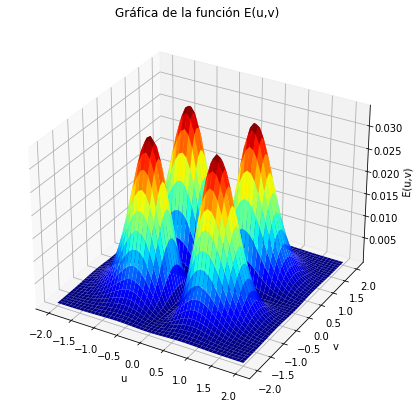

In [7]:
# Creamos grid
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
# Calculamos superficie
Z = (X*Y*np.exp(-X**2-Y**2))**2

# Creamos figura y ejes 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,2,1,projection='3d')

# Mostramos la superficie
surf = ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                        cstride=1, cmap='jet')

# Retocamos el plot 
ax.set(title='Gráfica de la función E(u,v)')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('E(u,v)')
plt.show()

Ahora aplicasmos el GD con el criterio del umbral y fijando el error que nos pide en el enunciado

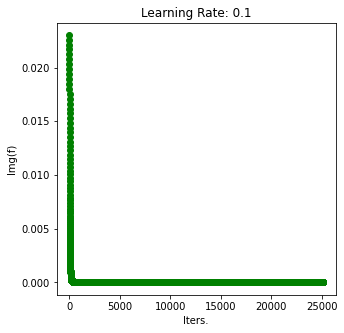

----------RESULTADOS----------
Num. Iteraciones: 25117
Tiempo:  11.436674356460571
Extremo: [0.01000084 0.01000084]
E(extremo): 9.99936950202903E-9


In [8]:
# Ajustamos los parámetros 
lr    = 0.1
point = np.array([0.5,0.5],dtype=np.float64)
u,v   = point[0],point[1]
error = 1e-8
max_iter = None

# Aplicamos el descenso del gradiente
ext, it, tiempo = gradient_descend(ini           = point,
                                   f             = E, 
                                   gradf         = gradE,
                                   error         = error,
                                   max_iter      = max_iter, # No va a usar este parametro porque eneable_error = True
                                   lr            = lr,
                                   eneable_error = True,
                                   eneable_plot  = True)

# Mostramos resultados
print("----------RESULTADOS----------")
print(f"Num. Iteraciones: {it}")
print("Tiempo: ",str(tiempo))
print(f"Extremo: {ext}")
print(f"E(extremo): {E(ext)}")

## EJERCICIO.1.3: X
Considerar ahora la función $f(x, y) = x^2 + 2y^2 + 2sin(2\pi x)sin(\pi y)$ \

**a**) Usar gradiente descendente para minimizar esta funcin. Usar como punto inicial $(x_0 =
-1, y_0 = 1)$, (tasa de aprendizaje $\eta$ = 0,01 y un máximo de 50 iteraciones. Generar un
gráfico de cómo desciende el valor de la función con las iteraciones. Repetir el experimento pero usando $\eta$ = 0,1, comentar las diferencias y su dependencia de $\eta$. \
**b**) Obtener el valor mínimo y los valores de las variables $(x, y)$ en donde se alcanzan cuando
el punto de inicio se fija en: (-0.5, -0.5), (1, 1), (2.1,-2.1), (-3, 3), (-2, 2). Generar una
tabla con los valores obtenidos. Comentar la dependencia del punto inicial.

Declaramos la función f, junto con sus derivadas parciales y el gradiente

In [9]:
def f(w):
    x = w[0]
    y = w[1]
    return (x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*np.sin(np.pi*y))

def fx(w):
    return (2*w[0] + 4*np.pi*np.cos(2*np.pi*w[0])*np.sin(np.pi*w[1]))

def fy(w):
    return (4*w[1] + 2*np.pi*np.sin(2*np.pi*w[0])*np.cos(np.pi*w[1]))

def gradf(w):
    return np.array([fx(w),fy(w)])

Mostramos la superficie que forma la gráfica de f

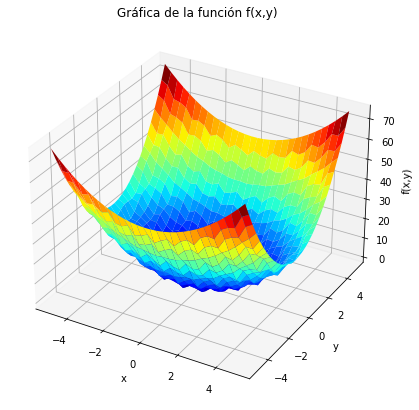

In [10]:
from mpl_toolkits.mplot3d import Axes3D

lim = 5 # X,YEstablecer el límite de los ejes
ct = 30 # Numero de particiones

# Creamos grid
x = np.linspace(-lim, lim, ct)
y = np.linspace(-lim, lim, ct)
# Construimos superficie 
X, Y = np.meshgrid(x, y)
Z = f([X,Y])

# Creamos figura y ejes 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,2,1,projection='3d')


surf = ax.plot_surface(X, Y, Z, edgecolor='none', rstride=1,
                        cstride=1, cmap='jet')

# Añadimos al plot información opcional como etiquetado de ejes y titutlo
ax.set(title='Gráfica de la función f(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

Corremos el algoritmo del GD para el punto (-1,1) usando los parámetros dados por el enunciado 1.3(a)

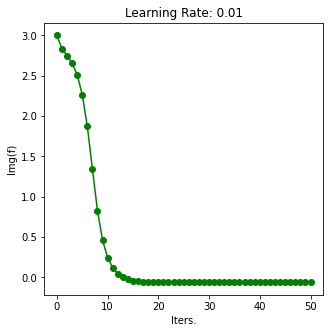

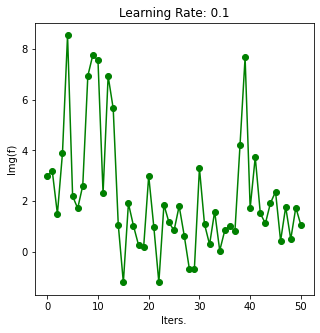

----------RESULTADOS----------

----------Learning Rate = 0.01----------
Num. Iteraciones: 49
Tiempo:  0.0009357929229736328
Extremo: [-1.21775644  0.41341775]
E(extremo): -0.06230890988479554

----------Learning Rate = 0.1----------
Num. Iteraciones: 49
Tiempo:  0.0005781650543212891
Extremo: [ 0.89558566 -0.06484486]
E(extremo): 1.0572997119448935


In [11]:
# Ajustamos los parametros
point    = np.array([-1.0,1.0],dtype=np.float64)
lr1      = 0.01
lr2      = 0.1
max_iter = 50

# Ejecutamos el gradiente descendente con dos learning rate distintos
ext1, it1, time1 = gradient_descend(point,f,gradf,max_iter = max_iter,lr = lr1, eneable_error = False, eneable_plot = True)
ext2, it2, time2 = gradient_descend(point,f,gradf,max_iter = max_iter,lr = lr2, eneable_error = False, eneable_plot = True)

# Imprimimos resultados
print("----------RESULTADOS----------")
print("\n----------Learning Rate = 0.01----------")
print(f"Num. Iteraciones: {it1}")
print("Tiempo: ",str(time1))
print(f"Extremo: {ext1}")
print(f"E(extremo): {f(ext1)}")
print("\n----------Learning Rate = 0.1----------")
print(f"Num. Iteraciones: {it2}")
print("Tiempo: ",str(time2))
print(f"Extremo: {ext2}")
print(f"E(extremo): {f(ext2)}")

Continuamos con la segunda parte del ejercicio

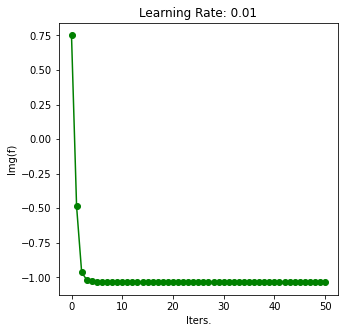

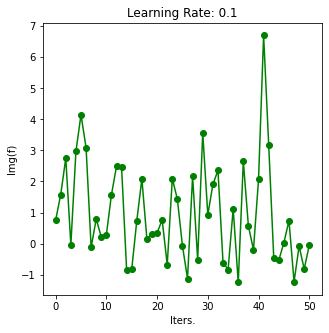

Punto de partida: [-0.5 -0.5]
Learning Rate: 0.01
Extremo: [-0.73075256 -0.41438233]
E(extremo): -1.0365801167150464
Punto de partida: [-0.5 -0.5]
Learning Rate: 0.1
Extremo: [-0.59058342 -0.56869956]
E(extremo): -0.057203438675033746


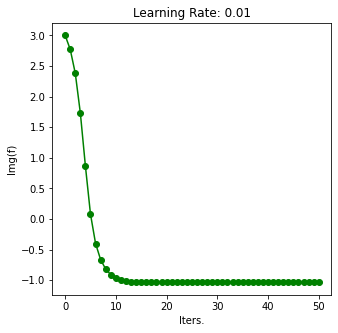

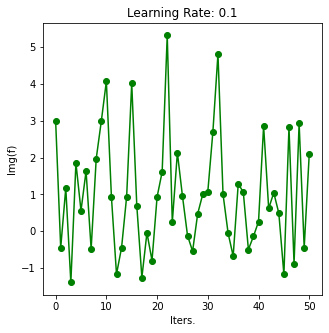

Punto de partida: [1. 1.]
Learning Rate: 0.01
Extremo: [0.73075261 0.41438455]
E(extremo): -1.0365801166494557
Punto de partida: [1. 1.]
Learning Rate: 0.1
Extremo: [0.32946921 0.40349995]
E(extremo): 2.109920309375648


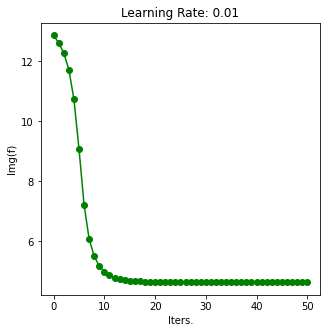

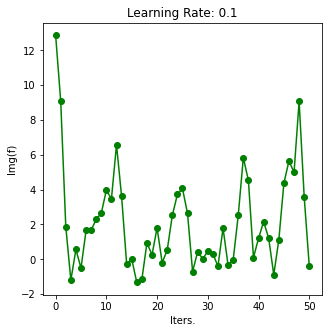

Punto de partida: [ 2.1 -2.1]
Learning Rate: 0.01
Extremo: [ 1.66511154 -1.17278239]
E(extremo): 4.6338399249937785
Punto de partida: [ 2.1 -2.1]
Learning Rate: 0.1
Extremo: [0.83952778 0.25871232]
E(extremo): -0.389923419730389


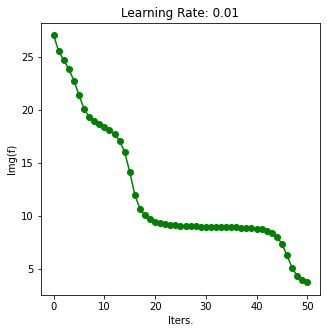

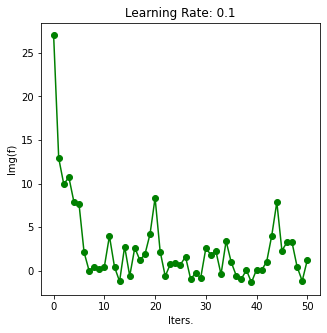

Punto de partida: [-3.  3.]
Learning Rate: 0.01
Extremo: [-2.18880457  0.58683011]
E(extremo): 3.6941858237202947
Punto de partida: [-3.  3.]
Learning Rate: 0.1
Extremo: [-0.15542951 -0.22975727]
E(extremo): 1.224705592141106


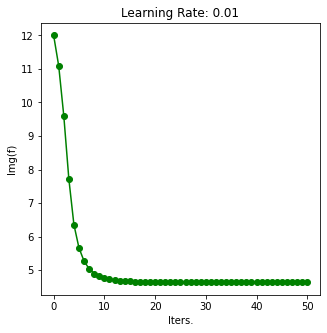

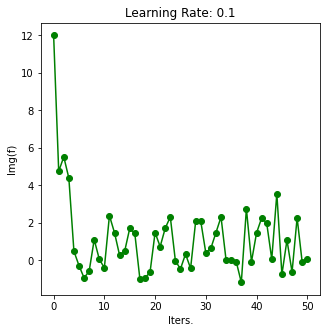

Punto de partida: [-2.  2.]
Learning Rate: 0.01
Extremo: [-1.66433551  1.17127365]
E(extremo): 4.633734084163328
Punto de partida: [-2.  2.]
Learning Rate: 0.1
Extremo: [0.53787264 0.28843767]
E(extremo): 0.08460939338432844


In [12]:
# Declaramos los puntos iniciales
points = [np.array([-0.5,-0.5],dtype=np.float64),
          np.array([1,1],      dtype=np.float64),
          np.array([2.1,-2.1], dtype=np.float64),
          np.array([-3,3],     dtype=np.float64),
          np.array([-2,2],     dtype=np.float64)]

# Declaramos los parámetros que vamos a usar del GD
lr1      = 0.01
lr2      = 0.1
max_iter = 50

# Declaramos los vectoees sobre los que vamos a ir guardando la informacion obtenida
# Para posteriormente almacenarla en un dataframe de Pandas
vext = []  # Extremos
vimgs = [] # Imagenes
vinip = [] # Puntos iniciales
vlr = []   # Learning rates

# Iteramos sobre los puntos
for count,value in enumerate(points):

    # Ejecutamos los algoritmos
    ext1, it1, time1 = gradient_descend(value,f,gradf,max_iter = max_iter,lr = lr1, eneable_error = False, eneable_plot = True)
    ext2, it2, time2 = gradient_descend(value,f,gradf,max_iter = max_iter,lr = lr2, eneable_error = False, eneable_plot = True)
   
    # Imprimimos Resultados
    print(f"Punto de partida: {value}")
    print(f"Learning Rate: {lr1}")
    print(f"Extremo: {ext1}")
    print(f"E(extremo): {f(ext1)}")
    
    # Imprimimos Resultados
    print(f"Punto de partida: {value}")
    print(f"Learning Rate: {lr2}")
    print(f"Extremo: {ext2}")
    print(f"E(extremo): {f(ext2)}")
    
    # Guardamos los resultados 
    vinip.append(value)
    vinip.append(value)
    
    vext.append(ext1)
    vext.append(ext2)
    
    vimgs.append(f(ext1))
    vimgs.append(f(ext2))
    
    vlr.append(lr1)
    vlr.append(lr2)
    


In [13]:
# Pasamos los datos a un DataFrame de Pandas
spoints = [value[0].astype(str) + ',' + value[1].astype(str) for value in vinip]        # Transformamos los arrays de puntos a strings
sextremos = [value[0].astype(str) + ',' + value[1].astype(str) for value in vext]       # Transformamos los extremos a string
data  = np.asarray([spoints,vlr,sextremos,vimgs])
cols = np.asarray(["Puntos Iniciales","Learning Rate","Extremos","Imagen"])
#dic = {'Puntos Iniciales':spoints,'Learning Rate','',''}
df = pd.DataFrame(data.T,columns=cols)
#df.to_csv('ejc2_b_tabla.csv')
df

,Puntos Iniciales,Learning Rate,Extremos,Imagen
0,"-0.5,-0.5",0.01,"-0.7307525565936905,-0.4143823292974116",-1.0365801167150464
1,"-0.5,-0.5",0.1,"-0.5905834249107228,-0.5686995604651517",-0.057203438675033746
2,"1.0,1.0",0.01,"0.7307526079076425,0.41438454709051764",-1.0365801166494557
3,"1.0,1.0",0.1,"0.32946921344975766,0.40349994714110804",2.109920309375648
4,"2.1,-2.1",0.01,"1.6651115365464078,-1.1727823906273156",4.6338399249937785
5,"2.1,-2.1",0.1,"0.8395277752559696,0.25871231846310727",-0.389923419730389
6,"-3.0,3.0",0.01,"-2.1888045674248513,0.5868301078836458",3.6941858237202947
7,"-3.0,3.0",0.1,"-0.1554295146286802,-0.229757266818454",1.224705592141106
8,"-2.0,2.0",0.01,"-1.6643355098173194,1.1712736530308994",4.633734084163328
9,"-2.0,2.0",0.1,"0.5378726384967437,0.28843766921498554",0.08460939338432844


EJERCICIO.1.4: (1.5 punto)\
 ¿Cuál sería su conclusión sobre la verdadera dificultad de encontrar el mínimo
global de una función arbitraria?

In [14]:
print("La respuesta a esta pregunta queda detallada en la memoria :)")

La respuesta a esta pregunta queda detallada en la memoria :)


# 2 EJERCICIO SOBRE REGRESIÓN LINEAL (5.5 puntos)


Declaramos funciones auxiliares

In [15]:
# Variables globales para designar a las etiquetas
label5 = 1
label1 = -1

##########################################################################################
####################################LECTURA DE DATOS######################################
##########################################################################################

def readData(file_x, file_y):
    # Leemos los ficheros 
    datax = np.load(file_x)
    datay = np.load(file_y)
    y = []
    x = []
    # Solo guardamos los datos cuya clase sea la 1 o la 5
    for i in range(0,datay.size):
        if datay[i] == 5 or datay[i] == 1:
            if datay[i] == 5:
                y.append(label5)
            else:
                y.append(label1)
            x.append(np.array([1, datax[i][0], datax[i][1]]))
            
    x = np.array(x, np.float64)
    y = np.array(y, np.float64)
    
    return x, y

##########################################################################################
################################### CÁLCULO DEL ERROR ####################################
##########################################################################################

def Err(x,y,w):
    """
    Calcula el error respecto a la variable w
    """
    # np.linalg.norm calcula la norma y np.dot el producto entre vectores y matrices
    err = (np.linalg.norm(np.dot(x,w) - y)**2)/len(x)
    return err

def dif_Err(x,y,w):
    """
    Derivada del error
    """
    diff = (2/len(x)) * np.dot( x.T , np.dot(x,w)-y )
    return diff
    
##########################################################################################
############################ GRADIENTE DESCENDENTE ESTOCÁSTICO ###########################
##########################################################################################    

def sgd(x,y,lr,minibatch_size,epochs):
    '''
    Función que aplica el algoritmo del gradiente descedente estocástico.
    Se inicializan los pesos a un valor muy pequeño. 
    
    Params
    ----------
        - x: Ejemplo de entrenamiento
        - y: Etiquetas
        - lr: learning rate
        - minibatch_size: tamaño del minibatch
        - epochs: epocas realizadas
    
    Return
    ----------
        - w: Pesos obtenidos como resultado de aplicar el algoritmo
    '''
    # Inicializamos los pesos con numeros pequeñitos
    w = np.random.uniform(0,0.2,x.shape[1])
    
    # Tomamos los indices de los ejemplos
    indices = np.arange(len(x))
    
    
    # Vamos iterando hasta hasta llegar al numero de epocas indicado en los argumentos de la funcion
    for i in range(epochs):
        ini = 0
        # Desordenamos los índices 
        np.random.shuffle(indices)
        
        # Calculamos el numero de pasos de ventana que va a hacer en una epoca
        it    = int(len(indices)/minibatch_size)
        
        # En caso de que el tamaño de la ventana no divida al numero de ejemplos, entrenamos con el resto
        # y por tanto añadimos una iteración mas 
        resto = len(indices)%minibatch_size
        if resto != 0:
            it +=1
            
        # Iteramos sobre los minilotes
        for j in range(it):
            
            # Ultimo indice del mini lote
            fini = ini + minibatch_size

            # Obtenemos el minilote 
            xb = x[indices[ini:fini]]
            yb = y[indices[ini:fini]]

            # Calculamos el gradiente
            grad = dif_Err(xb,yb,w)

            # Descenso del gradiente
            w = w - lr*grad

            # Actualizamos el minilote
            ini = fini

            # Si el tamalo del minilote no divide al conjunto de datos entrenamos con los datos faltantes
            if resto!=0:
                minibatch_size = resto
                
    
    return w

##########################################################################################
#################################### PSEUDO INVERSA ######################################
##########################################################################################


def pseudoinverse(x,y):
    """
    Calculo de los pesos a traves de operaciones algebraicas y usando la descomposición en valores singulares de X
    
    Params
    ----------
       - x: matrix nxm
            n es el número de ejemplos 
            m son las características
       - y: array 1D
            Etiquetas
        
    Return
    ----------
        -w: array 1D
            pesos tras regresión
    """
    # Descomponemos X en sus valores singulares, notamos que V ya está traspuesta
    U, D, V = np.linalg.svd(x,full_matrices=False)
    # D es un vector y lo invertimos
    Dinv = 1/D
    # Calculamos la pseudoinversa
    inv = V.T @ np.diag(Dinv) @ np.diag(Dinv) @ V  
    # Finalmente multiplicamos de nuevo por X.T y por y para obtener los pesos
    pseu = np.dot(inv,x.T)
    w    = np.dot(pseu,y)
    
    return w

##########################################################################################
######################################### PLOTS ##########################################
##########################################################################################


def plot_plain_3D(w,X,y,title,axis_labels,legend_labels):
    '''
    Función que visualiza en un espacio los puntos usados en el entrenamiento junto 
    con el plano generado generado por los pesos tras la regresión lineal.
    
    Nota: Función pensada para el ejercicio 2, aunque se puede generalizar 
    
    @Params:
        - w: pesos obtenidas tras aplicar el algoritmo sgd
        - x: Datos de entrenamienacco
        - y: etiquetas
        - title: título del plot
        - axis_labels: etiquetas de los ejes
        - legend_labels: etiquetas de la leyenda
        
    '''
    # Creamos la figura y los ejes
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111,projection='3d')
    
    # Pintamos los datos, para ello
    # identificamos las coordenadas según la clase
    # pintamos los puntos de dicha clase de un color
    for j,c in enumerate(np.unique(y)):
        
        ax_x = [x[1] for i,x in enumerate(X) if y[i] == c]
        ax_y = [x[2] for i,x in enumerate(X) if y[i] == c]
        
        ax.scatter(ax_x,ax_y,c,color=['darkorchid','black'][j],alpha=0.8)
        
    
    # etiquetamos los ejes
    ax.set_xlabel(axis_labels[0])
    ax.set_ylabel(axis_labels[1])
    ax.set_zlabel(axis_labels[2])
    
    # Determinamos los extremos de los valores para luego construir un grid con las proporciones adecaudas
    min_int = np.min(X[:,1])
    max_int = np.max(X[:,1])
    min_sim = np.min(X[:,2])
    max_sim = np.max(X[:,2])
    
    # Declaramos un grid de puntos equiespaciados para evaluar la función
    xx = np.linspace(min_int,max_int,20)
    yy = np.linspace(min_sim,max_sim,20)
    xx, yy = np.meshgrid(xx,yy)
    
    # Evaluamos en los puntos de la malla la función lineal obtenida 
    z = np.array(w[0]+xx*w[1]+yy*w[2])
    # Visualizamos el hiperplano 
    ax.plot_surface(xx,yy, z, color='aqua',alpha=0.6)
    
    # Creamos un gráfico en 2D que no muestre nada para poder poner leyenda,
    # debido a que la leyenda no admite el tipo devuelto por un scatter 3D,
    # https://stackoverflow.com/questions/20505105/add-a-legend-in-a-3d-scatterplot-with-scatter-in-matplotlib
    scatter_proxy1 = lines.Line2D([0],[0], linestyle="none", c='black', marker = 'o')
    scatter_proxy2 = lines.Line2D([0],[0], linestyle="none", c='darkorchid', marker = 'o')
    plane_proxy = lines.Line2D([0],[0], linestyle="none", c='aqua', marker = '_')
    ax.legend([scatter_proxy1,scatter_proxy2, plane_proxy], legend_labels, numpoints = 1, loc='upper left')
    
    #Cambiamos la posición del gráfico para que se vean mejor los datos y el hiperplano
    #https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
    ax.view_init(18,30) 
    
    plt.title(title)
    plt.show()
    
def plot_3D_non_linear(data,y,w):
    '''
    Función usada en el ejercicio 2.
    Muestra un espacio 3D en el que aparecen los puntos y la solución generada
    
    Nota: Función pensada para el ejercicio 2, aunque se puede generalizar 
    '''
    # Instannciamos figura y añadimos ejes 3D
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111,projection='3d')
    
    # Visualizamos puntos
    #ax.scatter(data[:,1],data[:,2],labels,color='black')
    
    # Obtenemos las coordenadas de los puntos según la clase y visualizamos
    for j,c in enumerate(np.unique(y)):
        
        ax_x = [x[1] for i,x in enumerate(data) if y[i] == c]
        ax_y = [x[2] for i,x in enumerate(data) if y[i] == c]
        
        ax.scatter(ax_x,ax_y,c,color=['darkorchid','black'][j],alpha=0.8)
    
    # Etiquetamos
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    ax.set_zlabel('Eje Z: Etiqueta')
    
    # Determinamos los extremos de los valores para luego construir un grid con las proporciones adecaudas
    min_int = np.min(data[:,1])
    max_int = np.max(data[:,1])
    min_sim = np.min(data[:,2])
    max_sim = np.max(data[:,2])
    
    # Declaramos un grid de puntos equiespaciados para evaluar la función
    xx = np.linspace(min_int,max_int,20)
    yy = np.linspace(min_sim,max_sim,20)
    xx, yy = np.meshgrid(xx,yy)
    
    # Evaluamos la función altura en los puntos para formar una superficie
    z = np.array(w[0]+xx*w[1]+yy*w[2]+xx*yy*w[3]+xx**2*w[4]+yy**2*w[5])
    
    # Visualizamos la superficie
    ax.plot_surface(xx,yy,z,color='blue',alpha=0.4)
    
    # Cambiamos la posicion de la camara 
    ax.view_init(18,30) 
    
    
    plt.title('Regresión Lineal con características no lineales usando SGD')
    plt.show()
    
    
def display_samples(X,y,w = None,title=None,labels=None,legend=None,lim=False):
    """
    Función que pinta en 2D los datos con colores distintos según la clase 
    junto con la recta de regresión
    """
    # Obtenemos el numro de clase
    clases = np.unique(y)
    dictionary = {}
    plt.figure(figsize=(7,7))
    
    # Dibujamos los puntos de distintos colores segun las clases
    for j,c in enumerate(clases):
        # Obtenemos las coordenadas (x,y) de los puntos que pertencen a la clase 'c'
        ax_x = [x[0] for i,x in enumerate(X) if y[i] == c]
        ax_y = [x[1] for i,x in enumerate(X) if y[i] == c]
        
        plt.scatter(ax_x,ax_y,color=['lightseagreen','darkorchid'][j],alpha=1)
    

    # Si queremos poner titulo
    if title != None:
        plt.title(title)
    # Si queremos poner etiquetas a los ejes
    if labels!=None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    
    if lim:
       # Calculamos limites de los puntos más alejados de la cuadrícula
        min_x1 = np.min(X[:,0])
        max_x1 = np.max(X[:,0])
        min_x2 = np.min(X[:,1])
        max_x2 = np.max(X[:,1])

        # Establecemos los límites de los ejes
        plt.xlim(min_x1,max_x1)
        plt.ylim(min_x2,max_x2)
       
    # Si nos dan los pesos dibujamos la recta de regresión
    # Para ello nos quedamos con la primera coordenada de los datos
    # y despejamos la segunda de la ecuación del hiperplano
    if len(w) != 0:
        xx  = X[:,0]
        yy = [(-w[0]-w[1]*i)/w[2] for i in xx]
        plt.plot(xx,yy,color='red',alpha=1)
        
    # Si queremos poner leyenda
    if legend != None:
        plt.legend(legend,loc='best',frameon = True)
    
    plt.show()
    
    
def curva_nivel(data,labels,w,cuadrado):
    '''
    Función que dado un conjunto de datos, sus etiquetas, los pesos y el grid, dibuja
    los puntos con distintos colores según las etiquetas (éstas deben de ser binarias) y la curva de nivel 0
    proporcionada por los pesos
    '''
    # Instanciamos figura
    plt.figure(figsize=(7,7))
    
    # Etiquetamos
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    
    # Identificamos etiquetas
    class_pos = np.array([i for i,j in zip(cuadrado,labels) if j==1])
    class_neg = np.array([i for i,j in zip(cuadrado,labels) if j==-1])
    
    # Creamos puntos
    pos = plt.scatter(x = class_pos[:,0], y = class_pos[:,1], c='darkcyan', marker='o')
    neg = plt.scatter(x = class_neg[:,0], y = class_neg[:,1], c='crimson', marker='*')
    
   
    # Determinamos los extremos de los valores para luego construir un grid con las proporciones adecuadas
    min_int = np.min(data[:,1])
    max_int = np.max(data[:,1])
    min_sim = np.min(data[:,2])
    max_sim = np.max(data[:,2])
    
    # Declaramos un grid de puntos equiespaciados para evaluar la función
    xx = np.linspace(min_int,max_int,20)
    yy = np.linspace(min_sim,max_sim,20)
    xx, yy = np.meshgrid(xx,yy)
    
    # Evaluamos la función altura en los puntos para formar una superficie
    z = np.array(w[0]+xx*w[1]+yy*w[2]+xx*yy*w[3]+xx**2*w[4]+yy**2*w[5])
    
    # Mostramos la curva de nivel
    plt.contour(xx,yy,z,[0],colors='magenta')#cmap = 'viridis',alpha=0.4)
    
    contorno_proxy = lines.Line2D([0],[0], linestyle="none", c='aqua', marker = '_')
    plt.legend([pos, neg, contorno_proxy], ['Etiqueta 1','Etiqueta -1','Solución obtenida'], numpoints = 1, loc='upper left')
    plt.show()

## EJERCICIO.2.1:  
Hacemos regresión lineal a un conjunto de datos con dos características leidos desde un fichero. Ajustamos con GD y con el algorimto de la pseudoinveresa. Tras ello mostramos las soluciones

Leemos los datos

In [16]:
directorio = 'datos/'
X_train, y_train = readData(directorio+'X_train.npy',directorio+'y_train.npy')
X_test , y_test  = readData(directorio+'X_test.npy' ,directorio+'y_test.npy')

Calculamos los pesos e imprimimos por pantalla los resultados

In [17]:
# Calculamos los pesos
psu = pseudoinverse(X_train,y_train)

# Imprimimos por pantalla
print("Vector de pesos:\n----------\n",psu)
print ('\nBondad del resultado:\n----------')
print ("Ein: ", Err(X_train,y_train,psu))
print ("Eout: ", Err(X_test, y_test, psu))

Vector de pesos:
----------
 [-1.11588016 -1.24859546 -0.49753165]

Bondad del resultado:
----------
Ein:  0.07918658628900395
Eout:  0.13095383720052595


Pitamos las soluciones juntos con los datos

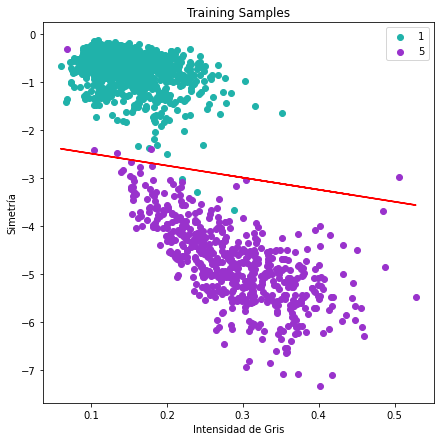

In [18]:
display_samples(X_train[:,1:],y_train,w=psu,title='Training Samples',labels=['Intensidad de Gris','Simetría'], legend=['1','5'])

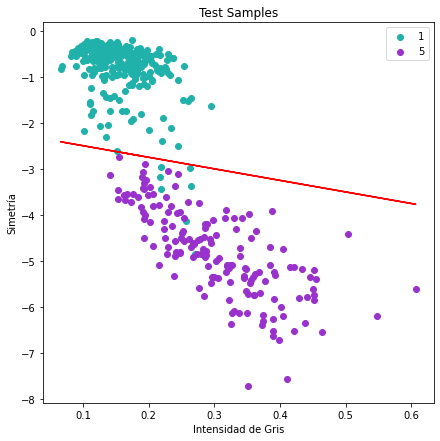

In [19]:
display_samples(X_test[:,1:],y_test,w=psu,title='Test Samples',labels=['Intensidad de Gris','Simetría'], legend=['1','5'])

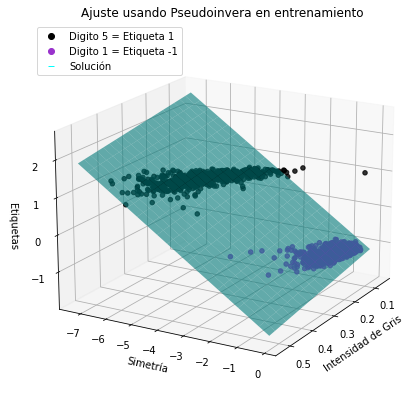

In [20]:
axis_labels = ['Intensidad de Gris','Simetría','Etiquetas']
legend_labels = ['Digito 5 = Etiqueta 1','Digito 1 = Etiqueta -1','Solución']
plot_plain_3D(psu,X_train,y_train,title='Ajuste usando Pseudoinvera en entrenamiento',axis_labels=axis_labels,legend_labels=legend_labels)

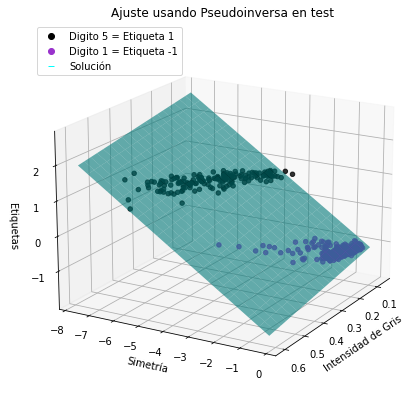

In [21]:
axis_labels = ['Intensidad de Gris','Simetría','Etiquetas']
legend_labels = ['Digito 5 = Etiqueta 1','Digito 1 = Etiqueta -1','Solución']
plot_plain_3D(psu,X_test,y_test,title='Ajuste usando Pseudoinversa en test',axis_labels=axis_labels,legend_labels=legend_labels)

### Gradiente Descendente Estocástico

Batch Size: 2
Pesos: [-1.11940503 -1.25741098 -0.46745212]
E_in 0.08789875619690361
E_out:  0.13268233799397108


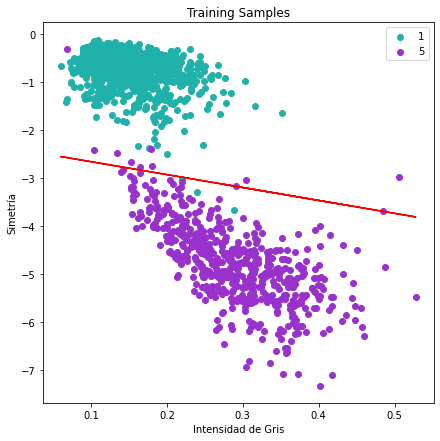

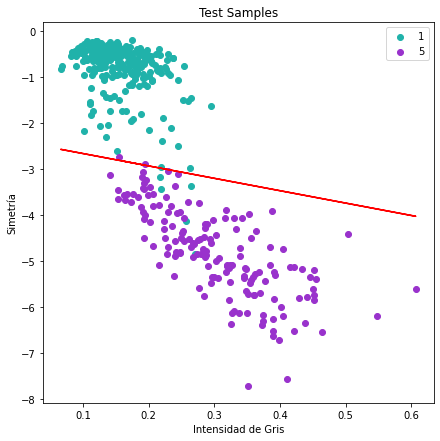

Batch Size: 8
Pesos: [-1.14957109 -1.26616656 -0.47502869]
E_in 0.08873659869451714
E_out:  0.1337884366752908


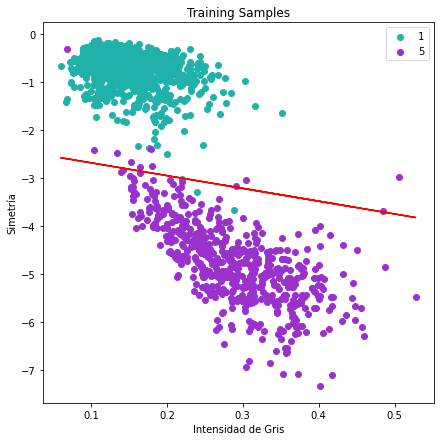

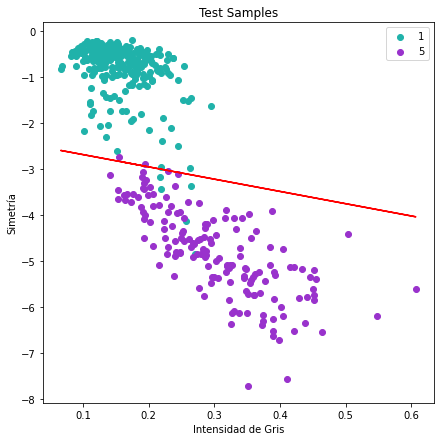

Batch Size: 16
Pesos: [-1.16095055 -1.24840421 -0.51740984]
E_in 0.08080418023317695
E_out:  0.13565826312123563


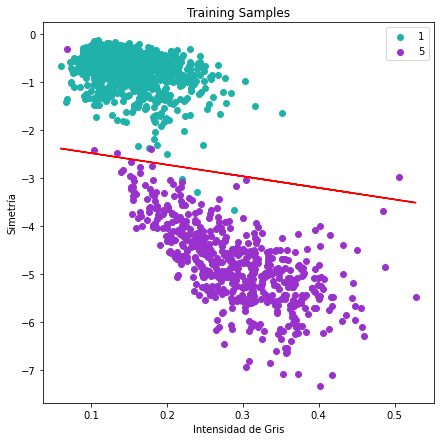

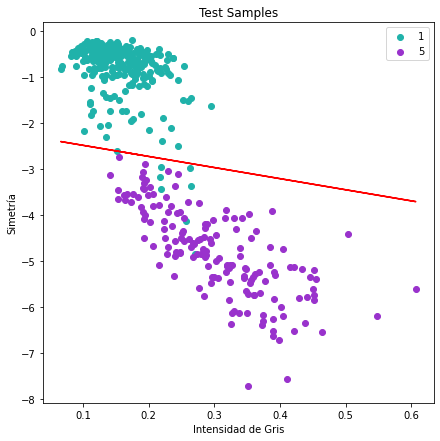

Batch Size: 64
Pesos: [-1.11132926 -1.25729763 -0.50120593]
E_in 0.07934878535115633
E_out:  0.13213392314066563


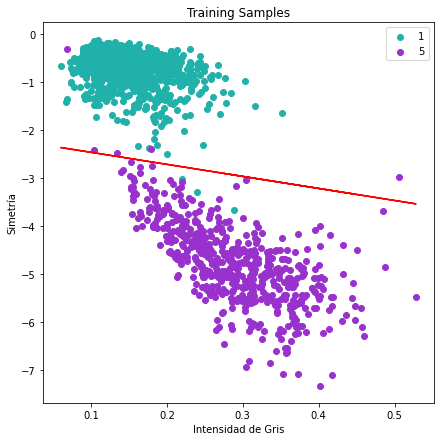

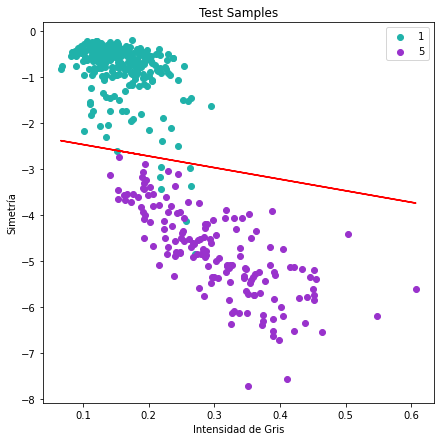

Batch Size: 128
Pesos: [-1.09732996 -1.24435416 -0.51042629]
E_in 0.08211534989550388
E_out:  0.13832981304349803


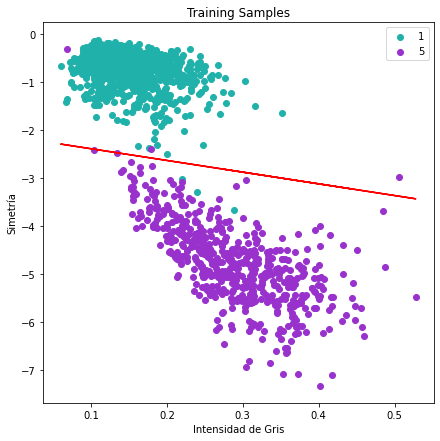

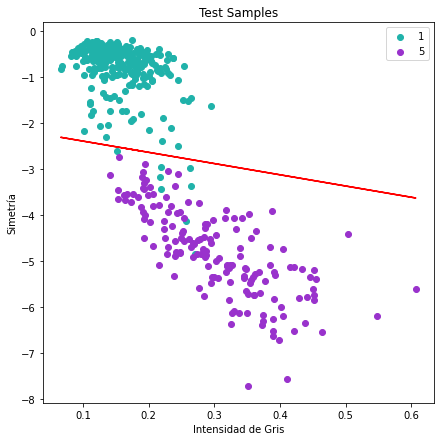

Batch Size: 256
Pesos: [-1.12003073 -1.24614988 -0.49121089]
E_in 0.07964541153395685
E_out:  0.1296990361949619


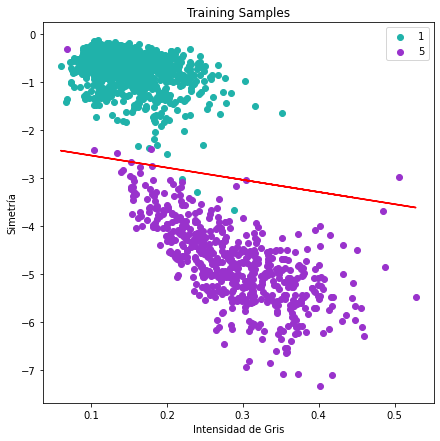

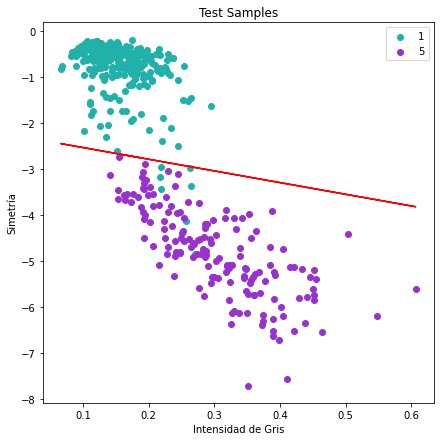

Batch Size: 1561
Pesos: [-1.02239435 -0.07687048 -0.39419943]
E_in 0.10771542920873224
E_out:  0.15548292595575539


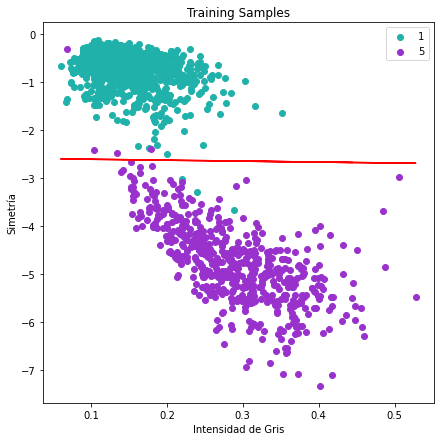

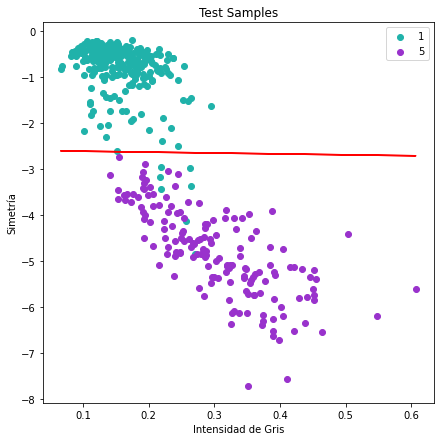

In [22]:
# Seleccionamos parámetros
batches = [2,8,16,64,128,256,len(X_train)]
epochs  = 200
lr      = 0.01
ws      = []
vEin    = []
vEout   = []
vacc    = []

axis_labels   = ['Intensidad de Gris','Simetría','Etiquetas']
legend_labels = ['Digito 5 = Etiqueta 1','Digito 1 = Etiqueta -1','Solución']

# Aplicamos el algoritmo a cada Batch
for batch in batches:
    # Calculamos pesos y errores
    w    = sgd(x=X_train,y=y_train,lr=lr,minibatch_size=batch,epochs=epochs)
    ein  = Err(X_train,y_train,w)
    eout = Err(X_test, y_test, w)
    #Guardamos las metricas en los respectivos vectores
    ws.append(w)
    vEin.append(ein)
    vEout.append(eout)
    #Visualizamos
    print(f'Batch Size: {batch}')
    print(f'Pesos: {w}')
    print(f'E_in {ein}')
    print ("E_out: ", eout)
    
    display_samples(X_train[:,1:],y_train,w=w,title='Training Samples',labels=['Intensidad de Gris','Simetría'], legend=['1','5'])
    display_samples(X_test[:,1:],y_test,w=w,title='Test Samples',labels=['Intensidad de Gris','Simetría'], legend=['1','5'])
    #plot_plain_3D(w,X_train,y_train,title='Separación en entrenamiento',axis_labels=axis_labels,legend_labels=legend_labels)
    #plot_plain_3D(w,X_test,y_test,title='Separación en test',axis_labels=axis_labels,legend_labels=legend_labels)

In [23]:
# Hacemos un dataframe para tener mejor agrupado los resultados
sws = [value[0].astype(str) + ',' + value[1].astype(str) +',' + value[2].astype(str) for value in ws]  # comvertimos los pesos a cadenas

data  = np.asarray([batches,sws,vEin,vEout])
cols = np.asarray(['Batch size','Pesos','Ein','Eout'])
df = pd.DataFrame(data.T,columns=cols)
#df.to_csv('nuevo.csv')
df

,Batch size,Pesos,Ein,Eout
0,2,"-1.1194050252359318,-1.2574109781295486,-0.467...",0.08789875619690361,0.13268233799397108
1,8,"-1.1495710873963843,-1.266166562869421,-0.4750...",0.08873659869451714,0.1337884366752908
2,16,"-1.160950553128255,-1.2484042127135604,-0.5174...",0.08080418023317695,0.13565826312123563
3,64,"-1.1113292629355525,-1.2572976336616828,-0.501...",0.07934878535115633,0.13213392314066563
4,128,"-1.0973299599420765,-1.244354159269267,-0.5104...",0.08211534989550388,0.13832981304349803
5,256,"-1.1200307296724412,-1.2461498779787366,-0.491...",0.07964541153395685,0.1296990361949619
6,1561,"-1.0223943475707573,-0.07687047756339781,-0.39...",0.10771542920873224,0.15548292595575539


## EJERCICIO.2.2:  
Declaramos algunas funciones auxiliares

In [24]:
def simula_unif(N=2, dims=2, size=(0, 1)):
    "Función proporcionada por el profesorado"
    m = np.random.uniform(low=size[0], 
                          high=size[1], 
                          size=(N, dims))
    return m


def sign(x):
    """
    Función signo
    """
    if x >= 0:
        return 1
    return -1

def label_data(x1,x2):
    """
    Función para etiquetar
    """
    return sign( (x1 - 0.2)**2 + x2**2 - 0.6)

**a**) Generamos una muestra de entrenamiento de $N = 1000$ puntos en el cuadrado $X = [−1, 1]\times
[−1, 1]$ y pintamos el mapa de puntos 2D.\

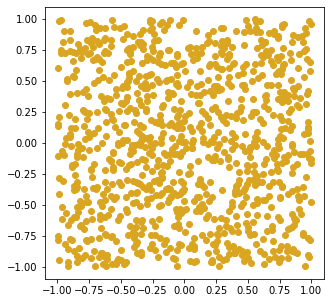

In [25]:
# Generamos un cuadrado tal y como indica el enunciado y lo mostramos por pantalla
cuadrado = simula_unif(N=1000,dims=2,size=[-1,1])
plt.figure(figsize=(5,5))
plt.scatter(x = cuadrado[:,0], y = cuadrado[:,1], c='goldenrod')

**b**) Consideremos la función $f(x_1, x_2) = sign((x_1 − 0,2)^2 + x_2^2 − 0,6)$ que usaremos para
asignar una etiqueta a cada punto de la muestra anterior. Introducimos ruido sobre las
etiquetas cambiando aleatoriamente el signo de un $10\%$ de las mismas. Pintar el mapa
de etiquetas obtenido.\

__Nota para el profesor:__ Como la generación de los puntos es pseudoaleatoria así como el etiquetado, cada ejecución va a proporcionar resultados distintos en cuento a los pesos y el error, por lo que los resultados expuestos para esta sección en la memoria y los que vienen aquí pueden variar. Sin embargo, la esencia se va a mantener, que es lo que en el fondo queremos analizar y estudiar.

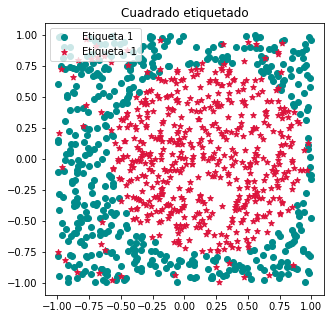

In [26]:
# Obtenemos las etiquetas e introducimos ruido al 10%
labels = np.array([label_data(x[0],x[1]) for x in cuadrado])
index = np.random.randint(len(labels),size=int(0.1*len(labels)))
labels[index] *= -labels[index]

# Tenemos dos clases, {1,-1}
class_pos = np.array([punto for punto,label in zip(cuadrado,labels) if label==1])
class_neg = np.array([punto for punto,label in zip(cuadrado,labels) if label==-1])


# Visualizamos
plt.figure(figsize=(5,5))
plt.scatter(x = class_pos[:,0], y = class_pos[:,1], c='darkcyan', marker='o')
plt.scatter(x = class_neg[:,0], y = class_neg[:,1], c='crimson', marker='*')
plt.legend( ['Etiqueta 1','Etiqueta -1'], loc='upper left')
plt.title("Cuadrado etiquetado")
plt.show()

**c**) Usando como vector de características (1, x1, x2), ajustar un modelo de regresión lineal al conjunto de datos generado y estimar los pesos ${\bf w}$. Estimar el error de ajuste $E_{in}$ usando SGD. 

Pesos:  [-0.08741323 -0.44035824 -0.05214165]
E_in:  0.9296748010222675


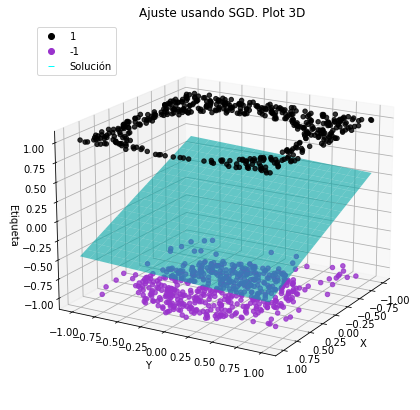

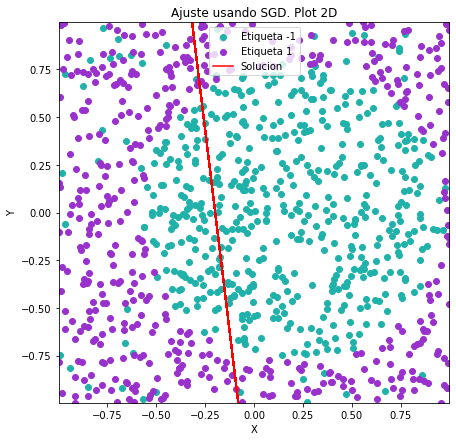

In [27]:
# Añadimos una característica más al conjunto de datos
data = np.asarray([[1,x1,x2] for x1,x2 in cuadrado])

# Aplicamos SGD 
w = sgd(x = data,y = labels,lr = 0.01,minibatch_size = 64,epochs = 200)


print("Pesos: ",w)
print("E_in: ", Err(data,labels,w))



title1 = 'Ajuste usando SGD. Plot 3D'
axis_labels1 = ['X','Y','Etiqueta']
legend1 = ['1','-1','Solución']
plot_plain_3D(w,data,labels,title1,axis_labels1,legend1)

title2 = 'Ajuste usando SGD. Plot 2D'
axis_labels2 = ['X','Y']
display_samples(X = data[:,1:],y = labels,w = w,title = title2,labels=axis_labels2,legend=['Etiqueta -1','Etiqueta 1','Solucion'],lim=True)





**d**) Ejecutar todo el experimento definido por (a)-(c) 1000 veces (generamos 1000 muestras
diferentes) y calcular el valor medio de los errores $E_{in}$ de las 1000 muestras.
Generar 1000 puntos nuevos por cada iteración y calcular con ellos el valor de $E_{out}$
en dicha iteración. Calcular el valor medio de $E_{out}$ en todas las iteraciones. \

In [28]:
def gen_datos():
    """
    Fun ción que genera 1000 datos aleatorios en un cuadrado definido en [-1,1]x[-1,1]
    """
    
    # Creamos el cuadrado
    cuadrado = simula_unif(N=1000,dims=2,size=[-1,1])
    
    # Obtenemos las etiquetas e introducimos ruido al 10%
    labels = np.array([label_data(x[0],x[1]) for x in cuadrado])
    index = np.random.randint(len(labels),size=int(0.1*len(labels)))
    labels[index] *= -labels[index]
    
    # Generamos conjunto de datos constituido por tres caracteríticas
    data_gen = np.array([[1,x1,x2] for x1,x2 in cuadrado])
    
    return data_gen, labels

In [29]:
N     = 1000
vEin  = []
vEout = []

for i in range(N):
    # Generamos datos
    data,labels = gen_datos()
    # Calculamos pesos y calculamos error Ein
    w = sgd(x = data,y = labels,lr = 0.01,minibatch_size = 64,epochs = 200)
    vEin.append(Err(data,labels,w))
    # Generamos datos de test y calculamos Eout
    xtest,ytest = gen_datos()
    vEout.append(Err(xtest,ytest,w))
    
# Calculamos media
mean_Ein  = np.asarray(vEin).mean()
mean_Eout = np.asarray(vEout).mean()

print("---------- RESULTADOS ----------")
print("Media E_in:  ", mean_Ein)
print("Media_E_out: ", mean_Eout)

---------- RESULTADOS ----------
Media E_in:   0.9076457003716607
Media_E_out:  0.9134979439998868


**e**) Valore qué tan bueno considera que es el ajuste con este modelo lineal a la vista de los
valores medios obtenidos de $E_{in}$ y $E_{out}$.

In [30]:
print("Este apartado está plasmado en la memoria :)")

Este apartado está plasmado en la memoria :)


*   Repetir el mismo experimento anterior pero usando características no lineales. Ahora
usaremos el siguiente vector de características: $\Phi(x) = (1, x_1, x_1^2,x_1x_2, x_2, x_2^2)$. Ajustar el nuevo modelo de regresión lineal y calcular el nuevo vector de pesos $\bf\hat w$. Calcular los errores promedio de $E_{in}$ y $E_{out}$.
*   A la vista de los resultados de los errores promedios $E_{in}$ y $E_{out}$ obtenidos en los dos experimentos, ¿qué modelo considera que es el más adecuado? Justifique la respuesta. 

A continuación creamos una función que automatize el proceso de cración del cuadrado y etiquetado con ruido

In [31]:
def gen_datos2(visualize = False):
    
    # Creamos el cuadrado
    cuadrado = simula_unif(N = 1000,dims = 2,size = [-1,1])
    
    # Obtenemos las etiquetas e introducimos ruido al 10%
    labels = np.array([label_data(x[0],x[1]) for x in cuadrado])
    index = np.random.randint(len(labels),size=int(0.1*len(labels)))
    labels[index] *= -labels[index]
        
    # Si queremos visualizar 
    if visualize == True:
        # Tenemos dos clases, {1,-1}
        class_pos = np.array([i for i,j in zip(cuadrado,labels) if j==1])
        class_neg = np.array([i for i,j in zip(cuadrado,labels) if j==-1])

        # Visualizamos
        plt.figure(figsize=(7,7))
        plt.scatter(x = class_pos[:,0], y = class_pos[:,1], c='darkcyan', marker='o')
        plt.scatter(x = class_neg[:,0], y = class_neg[:,1], c='crimson', marker='*')

        plt.title("Cuadrado etiquetado")
        plt.show()
    
    # Generamos conjunto de datos constituido por características no lineales
    data_gen = np.array([[1,x1,x2,x1*x2,x1**2,x2**2] for x1,x2 in cuadrado])
    
    return data_gen, labels, cuadrado

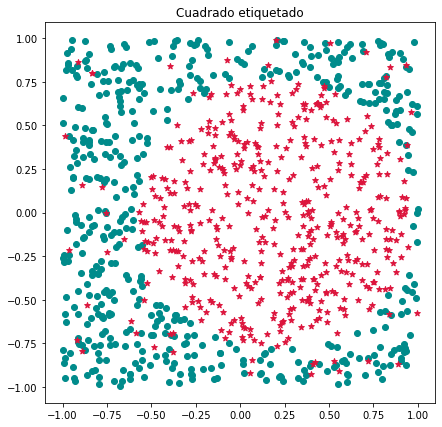

In [32]:
# Obtenemos datos, etiquetas, y visualizamos
data, labels, cuadrado = gen_datos2(visualize = True)

Pesos:  [-1.06916247 -0.5113434   0.04186076  0.06996051  1.38123181  1.74888971]
E_in:  0.4492987498289025


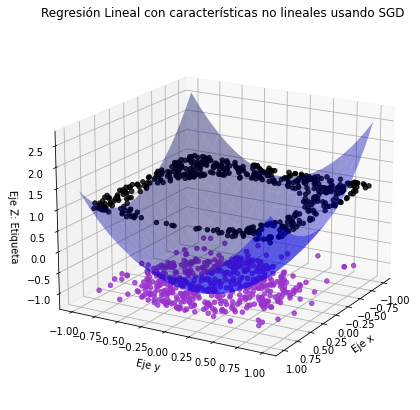

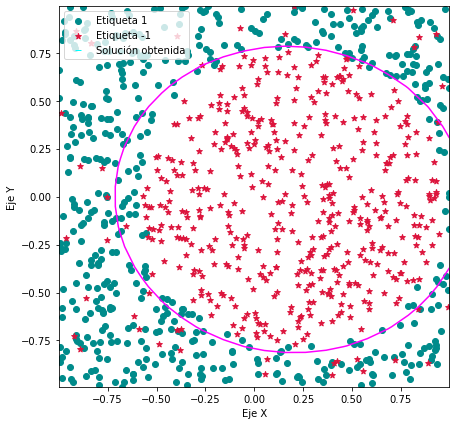

In [33]:
# Ajustamos los datos usando SGD
w = sgd(x = data,y = labels,lr = 0.01,minibatch_size = 64,epochs = 200)

# Imprimimos y graficamos resultados
print("Pesos: ",w)
print("E_in: ", Err(data,labels,w))
plot_3D_non_linear(data,labels,w)
curva_nivel(data,labels,w,cuadrado)

In [34]:
# Realizamos el experimento antrior 1000 veces
N     = 1000
vEin  = []  # Vector que guarda las Ein de para cada experimento
vEout = []  # Vector que gurda las Eout para cada experimento

for i in range(N):
    # Generamos datos
    data,labels,cuadrado = gen_datos2()
    # Calculamos pesos y calculamos error Ein
    w = sgd(x = data,y = labels,lr = 0.01,minibatch_size = 64,epochs = 200)
    vEin.append(Err(data,labels,w))
    # Generamos datos de test y calculamos Eout
    xtest,ytest,cuadrado = gen_datos2()
    vEout.append(Err(xtest,ytest,w))
    
# Calculamos media
mean_Ein  = np.asarray(vEin).mean()
mean_Eout = np.asarray(vEout).mean()

# Visualizamos resultados
print("---------- RESULTADOS ----------")
print("Media E_in:  ", mean_Ein)
print("Media_E_out: ", mean_Eout)

---------- RESULTADOS ----------
Media E_in:   0.4643787612113775
Media_E_out:  0.47153860005488263


# **BONUS** (2 puntos) 


Declaramos la función principal, sus derivadas primeras y segundas y los operadores gradiente y Hessiano.

In [35]:
# Las definimos numéricamente
def f(w):
    return w[0]**2 + 2*w[1]**2 + 2*sp.sin(2*sp.pi*w[0])*sp.sin(sp.pi*w[1])

def fx(w):
    return (2*w[0] + 4*np.pi*np.cos(2*np.pi*w[0])*np.sin(np.pi*w[1]))

def fy(w):
    return (4*w[1] + 2*np.pi*np.sin(2*np.pi*w[0])*np.cos(np.pi*w[1]))

def gradf(w):
    return np.array([fx(w),fy(w)])

def fxx(w):
    return -8*(np.pi**2)*np.sin(2*np.pi*w[0])*np.sin(np.pi*w[1]) + 2

def fyy(w):
    return -2*(np.pi**2)*np.sin(2*np.pi*w[0])*np.sin(np.pi*w[1]) + 4

def fxy(w):
    return 4*(np.pi**2)*np.cos(2*np.pi*w[0])*np.cos(np.pi*w[1]) + 4

def gradf(w):
    return np.array([fx(w), fy(w)],np.float64)

def Hess_f(w):
    return np.array([[fxx(w),fxy(w)],[fxy(w),fyy(w)]],dtype=np.float64)


Declaramos el método de Newton y del gradiente descendente. El segundo lo volvemos a declarar para que devuelva un vector de imágenes.

In [36]:
def Newton_method(ini,f,grad_f,Hess_f,lr,max_iter):
    """
    Método de minimización de Newton
    
    Parametros
    ----------
        - ini: np.ndarray/list
            Puntos iniciales sobre los que parte el algoritmo
            
        - f: funcion
            Funcion a minimizar
            
        - grad_f: funcion
            Gradiente de f
            
        - Hess_f: funcion
            Hessiano de f
            
        - lr: float
            Learning rate
            
        - max_iter: int
            Numero de iteraciones que se llevaran a cabo
    
    Return
    ----------
        - w: list
            Punto obtenido tras aplicar el método
        - ws: list
            Vector con los puntos por los que ha ido pasando el algoritmo
        - imagen: np.ndarray
            Vector con las imágenes de los puntos por loque ha ido pasando el método
    """
    # Guardamos en el vector de puntos y el de las imagenes informacino del punto inicial
    w      = ini
    ws     = [ini]
    imagen = [f(w)]
    
    for i in range(max_iter):
        # Calculamos la ivnersa de la matriz Hessiana en el punto w
        H1_inv = np.linalg.inv(Hess_f(w))
        # Actualizamos el punto
        w      = w - lr*np.dot(H1_inv,grad_f(w))
        #Añadimos inormación a los vectores de salida
        ws.append(w)
        imagen.append(f(w))

    return w,ws,np.asarray(imagen)


def gdv2(w,f,gradf,lr,max_iter):
    """
    Gradiente descendente
    
    Parametros
    ----------
        - w: np.ndarray
            Vecctor con los puntos iniciales
            
        - f,grad_f: funciones
            Funcion a minimizar y su gradiente
            
        - lr: float,
            Learning rate
            
        - max_iter: int
            número máximo de iteraciones
    
    Return
    ----------
        - w: np.ndarray
            Solucion obtenida por el algoritmo
            
        - ws: np.ndarray
            Vector con los puntos por los que ha ido pasando el algoritmo
            
        - imgs: np.ndarray
            Veccor que contiene las imagenes de los puntos correspondientes a ws
    """
    ini = w
    imgs = [f(ini)]
    ws = [w]
    for i in range(max_iter):
    
        w = w - lr*gradf(w)
        imgs.append(f(w))
        ws.append(w)
    
    return w, ws,np.asarray(imgs)

Ejecutamos el método de Newton y comprobamos sus resultados con SGD. Lo hacemos con 50 iteraciones tal y como está hecho en el ejericio 1.3

Punto de inicio =  [-0.5 -0.5]


=====Método de Newton lr=0.01
Valor mínimo:  2*sin(0.914446589140134*pi)*sin(0.979822005726377*pi) + 1.91243791950646
Extreamos:
 ( -0.48991100286318867 , -0.9144465891401339 )


=====Método de Newton lr=0.1
Valor mínimo:  2*sin(0.221129319337022*pi)*sin(1.00630670666246*pi) + 2.03753091971529
Extremos:
 ( -0.1105646596685109 , -1.0063067066624556 )


=====Gradiente descendente con lr=0.1
Valor mínimo:  2*sin(0.414382329297412*pi)*sin(1.46150511318738*pi) + 0.877424728636112
Extremos:
 ( -0.7307525565936905 , -0.4143823292974116 )


=====Gradiente descendente con lr=0.01
Valor mínimo:  2*sin(0.568699560465152*pi)*sin(1.18116684982145*pi) + 0.995627161925793
Extremos:
 ( -0.5905834249107228 , -0.5686995604651517 )


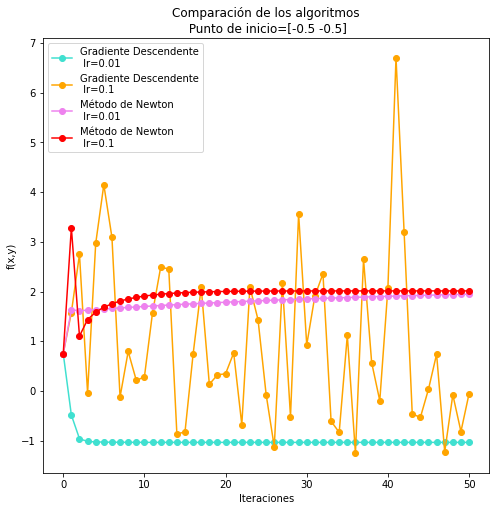

Punto de inicio =  [1. 1.]


=====Método de Newton lr=0.01
Valor mínimo:  2*sin(0.0942321712155598*pi)*sin(1.02551550599053*pi) + 3.19981620279259
Extreamos:
 ( 1.04711608560778 , 1.0255155059905308 )


=====Método de Newton lr=0.1
Valor mínimo:  2*sin(0.251864805597745*pi)*sin(1.08204714656862*pi) + 3.60937583046704
Extremos:
 ( 1.1259324027988724 , 1.0820471465686226 )


=====Gradiente descendente con lr=0.1
Valor mínimo:  2*sin(0.414384547090518*pi)*sin(1.46150521581529*pi) + 0.877428479698648
Extremos:
 ( 0.7307526079076425 , 0.41438454709051764 )


=====Gradiente descendente con lr=0.01
Valor mínimo:  0.434174377296956 + 2*sin(0.403499947141108*pi)*sin(0.658938426899515*pi)
Extremos:
 ( 0.32946921344975766 , 0.40349994714110804 )


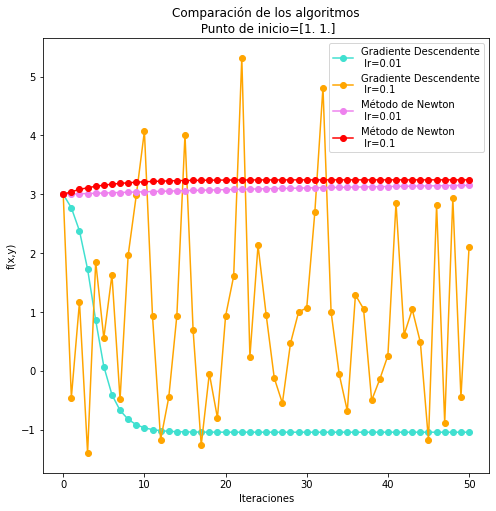

Punto de inicio =  [ 2.1 -2.1]


=====Método de Newton lr=0.01
Valor mínimo:  -2*sin(0.217092733987315*pi)*sin(0.426121580276592*pi) + 14.7286384430462
Extreamos:
 ( 2.213060790138296 , -2.2170927339873145 )


=====Método de Newton lr=0.1
Valor mínimo:  2*sin(0.434529808836437*pi)*sin(1.45054558944706*pi) + 3.354198525748
Extremos:
 ( 1.7252727947235291 , 0.43452980883643666 )


=====Gradiente descendente con lr=0.1
Valor mínimo:  -2*sin(1.17278239062732*pi)*sin(1.33022307309282*pi) + 5.52343350067098
Extremos:
 ( 1.6651115365464078 , -1.1727823906273156 )


=====Gradiente descendente con lr=0.01
Valor mínimo:  2*sin(0.258712318463107*pi)*sin(1.67905555051194*pi) + 0.83867101287535
Extremos:
 ( 0.8395277752559696 , 0.25871231846310727 )


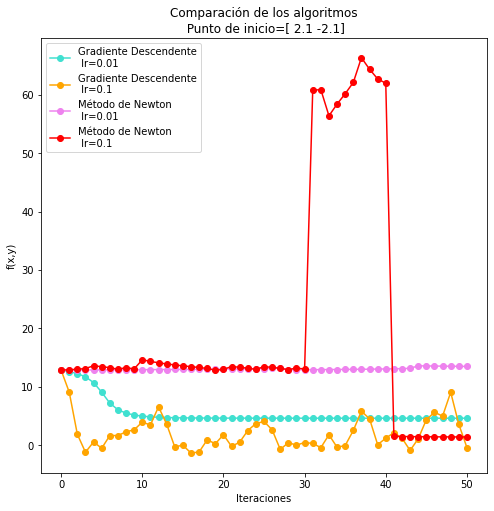

Punto de inicio =  [-3.  3.]


=====Método de Newton lr=0.01
Valor mínimo:  -2*sin(0.898301445786133*pi)*sin(1.7047476327791*pi) + 24.9363389297167
Extreamos:
 ( -2.852373816389551 , 2.898301445786133 )


=====Método de Newton lr=0.1
Valor mínimo:  -2*sin(0.877891740709687*pi)*sin(1.79738842485325*pi) + 5.14642752911493
Extremos:
 ( -1.8986942124266242 , 0.8778917407096866 )


=====Gradiente descendente con lr=0.1
Valor mínimo:  -2*sin(0.377609134849703*pi)*sin(0.586830107883646*pi) + 5.47960458541735
Extremos:
 ( -2.1888045674248513 , 0.5868301078836458 )


=====Gradiente descendente con lr=0.01
Valor mínimo:  0.12973513732948 + 2*sin(0.229757266818454*pi)*sin(0.31085902925736*pi)
Extremos:
 ( -0.1554295146286802 , -0.229757266818454 )


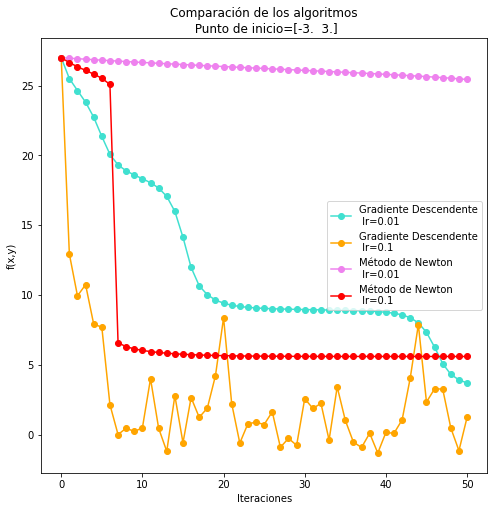

Punto de inicio =  [-2.  2.]


=====Método de Newton lr=0.01
Valor mínimo:  -2*sin(0.0466155398009844*pi)*sin(0.165250029482878*pi) + 12.7145972875365
Extreamos:
 ( -2.082625014741439 , 2.0466155398009844 )


=====Método de Newton lr=0.1
Valor mínimo:  -2*sin(1.22766367590919*pi)*sin(1.39488685144167*pi) + 5.89563038581659
Extremos:
 ( -1.6974434257208346 , 1.2276636759091857 )


=====Gradiente descendente con lr=0.1
Valor mínimo:  -2*sin(1.1712736530309*pi)*sin(1.32867101963464*pi) + 5.51377662980757
Extremos:
 ( -1.6643355098173194 , 1.1712736530308994 )


=====Gradiente descendente con lr=0.01
Valor mínimo:  2*sin(0.288437669214986*pi)*sin(1.07574527699349*pi) + 0.455699553287796
Extremos:
 ( 0.5378726384967437 , 0.28843766921498554 )


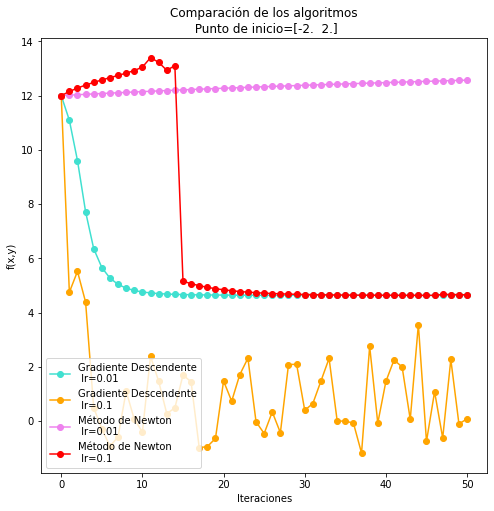

In [37]:
# Puntos iniciales
points   = np.array([ [-0.5,-0.5],[1,1],[2.1,-2.1],[-3,3],[-2,2] ])

# Parámetros
lr1      = 0.01
lr2      = 0.1
epochs   = 50

# Vectores que guardan informacion para luego hacer un dataframe
vlr   = []  # Vectores de learning rates
vext  = []  # Vectores con los extremos
vimgs = []  # Vectores con la imagenes de los extremos

for count,value in enumerate(points):
    # Aplicamos los metodos
    w1, ws1,img1    = gdv2(w=value,f = f,gradf = gradf,lr=lr1,max_iter=epochs)
    w2, ws2,img2    = gdv2(w=value,f = f,gradf = gradf,lr=lr2,max_iter=epochs)
    wN1, wsN1,imgN1 = Newton_method(ini = value ,f = f,grad_f = gradf,Hess_f = Hess_f,lr=lr1,max_iter=epochs)
    wN2, wsN2,imgN2 = Newton_method(ini = value ,f = f,grad_f = gradf,Hess_f = Hess_f,lr=lr2,max_iter=epochs)
    
    # Guardamos los resultados para luego mostrarlos en un dataframe
    vlr.append(lr1)
    vlr.append(lr2)
    vext.append(wN1)
    vext.append(wN2)
    vimgs.append(imgN1[len(imgN1)-1])
    vimgs.append(imgN2[len(imgN1)-1])
    
    # Imprimimos por pantalla los resultados
    print("====================================")
    print("Punto de inicio = ",value)
    print("")
    print("\n=====Método de Newton lr=0.01")
    print("Valor mínimo: ",f(wN1))
    print("Extreamos:\n (", wN1[0],',',wN1[1],')')
    print("")
    print("\n=====Método de Newton lr=0.1")
    print("Valor mínimo: ",f(wN2))
    print("Extremos:\n (", wN2[0],',',wN2[1],')')
    print("")
    print("\n=====Gradiente descendente con lr=0.1")
    print("Valor mínimo: ",f(w1))
    print("Extremos:\n (", w1[0],',',w1[1],')')
    print("")
    print("\n=====Gradiente descendente con lr=0.01")
    print("Valor mínimo: ",f(w2))
    print("Extremos:\n (", w2[0],',',w2[1],')')
  
    
    
    # Visualizamos la curva de decrecimiento de los valores de la función
    # Instanciamos la figura
    plt.figure(figsize=(8,8))
    # Mostramos los plots
    plt.plot(range(epochs+1),img1, color='turquoise',marker='o',label=f'Gradiente Descendente\n lr={lr1}')
    plt.plot(range(epochs+1),img2, color='orange',   marker='o',label=f'Gradiente Descendente\n lr={lr2}')
    
    plt.plot(range(epochs+1),imgN1,color='violet',   marker='o',label=f'Método de Newton\n lr={lr1}')
    plt.plot(range(epochs+1),imgN2,color='red',      marker='o',label=f'Método de Newton\n lr={lr2}')
    # Añadimos el titulo, etiquetas, legenda,...
    plt.title(f'Comparación de los algoritmos\n Punto de inicio={value}')
    plt.xlabel('Iteraciones')
    plt.ylabel('f(x,y)')
    plt.legend()
    plt.show()
    

In [38]:
data  = np.asarray([vlr,vext,np.float64(vimgs)])
cols = np.asarray(['lr','Extremos','Imagen'])
df = pd.DataFrame(data.T,columns=cols)
#df.to_csv('Newton.csv')
df

<ipython-input-38-37908496a5e8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data  = np.asarray([vlr,vext,np.float64(vimgs)])


,lr,Extremos,Imagen
0,0.01,"[-0.48991100286318867, -0.9144465891401339]",1.94608
1,0.1,"[-0.1105646596685109, -1.0063067066624556]",2.01217
2,0.01,"[1.04711608560778, 1.0255155059905308]",3.1531
3,0.1,"[1.1259324027988724, 1.0820471465686226]",3.24677
4,0.01,"[2.213060790138296, -2.2170927339873145]",13.5017
5,0.1,"[1.7252727947235291, 0.43452980883643666]",1.41994
6,0.01,"[-2.852373816389551, 2.898301445786133]",25.439
7,0.1,"[-1.8986942124266242, 0.8778917407096866]",5.59137
8,0.01,"[-2.082625014741439, 2.0466155398009844]",12.5698
9,0.1,"[-1.6974434257208346, 1.2276636759091857]",4.65492
